In [16]:
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from pandas import Series, DataFrame
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi
from sklearn.decomposition import PCA 
import seaborn as sns 
%matplotlib inline 
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from IPython.display import display
sns.set_style('whitegrid')
sns.set_context('talk')
# Eliminate false positive SettingWithCopyWarning
pd.options.mode.chained_assignment = None

In [17]:
# Original Data Set
df = pd.read_csv("../knn/Suspicious Txn Card analysis.csv")
print ("There are {0:d} records in dataset.".format(len(df)))
df.head()

There are 1000 records in dataset.


,CARD_NUMBER,Date,Date Diff,Time,Amount,CURRENCY,TRANS_TYPE,ADDRESS_NAME
0,416211XXXXXXZZZZ,9/15/2017,1,5:08:39 PM,"10,000",INR,700,"SBI TOWER CHOW , INDIA"
1,416211XXXXXXZZZZ,9/16/2017,0,8:23:31 AM,"10,000",INR,700,"ADB BRANCH , INDIA"
2,416211XXXXXXYYYY,9/1/2017,0,10:41:10 AM,"1,600",INR,774,"FORTIS RAJAN DHALL HOSPIT , INDIA"
3,416211XXXXXXYYYY,9/1/2017,0,11:07:11 AM,"5,455",INR,774,"Fortis - Rajan Dhall Hosp , INDIA"
4,416211XXXXXXYYYY,9/1/2017,4,11:06:28 AM,"5,455",INR,774,"Fortis - Rajan Dhall Hosp , INDIA"


In [18]:
# Modified Data Set
df1 = pd.read_csv("../knn/KNN data.csv")
print ("There are {0:d} records in dataset.".format(len(df)))
df1.head()
headers = df1.dtypes.index[1:7]



There are 1000 records in dataset.


In [19]:
# Scaling the Data

new_df = df1
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(new_df)
df_norm = pd.DataFrame(np_scaled)
df_norm1 = df_norm[df_norm.columns[1:7]]
df_norm1.columns = headers


In [20]:
#Splitting Data Set
n_estimators=25
import pandas as pd
from IPython.display import display
df= pd.read_csv("../knn/KNN data.csv")


predictors = df[df.columns[1:7]]
target = df[df.columns[0]]

# Split into training and testing sets+
training_data, test_data, training_target, test_target  = train_test_split(predictors, target, test_size=.25)



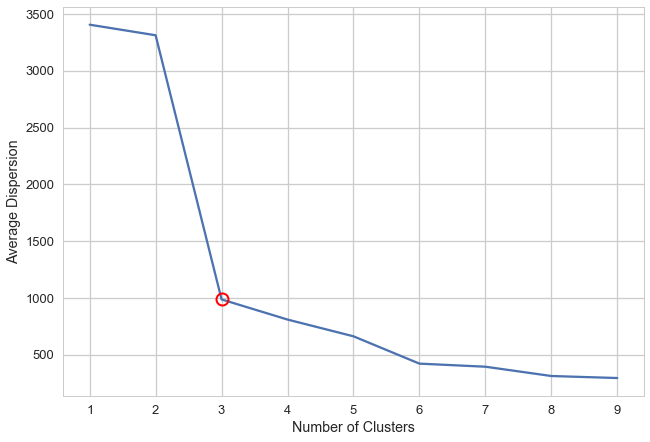

In [21]:
# Identify number of clusters using the elbow method
clusters=range(1,10)
meandist=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(training_data)
    clusassign=model.predict(training_data)
    dist = sum(np.min(cdist(training_data, model.cluster_centers_, 'euclidean'), axis=1))
    meandist.append(dist / training_data.shape[0])

# Visualize the elbow
k = 3

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(clusters, meandist)
ax.plot(clusters[(k-1)], meandist[(k-1)], marker='o', markersize=12, 
    markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of Clusters')
plt.ylabel('Average Dispersion')
plt.show()

In [22]:
#Principal Component Analysis
# Calculating Eigenvectors and eigenvalues of Cov matirx
import numpy as np
mean_vec = np.mean(df_norm1, axis=0)
cov_mat = np.cov(df_norm1.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

In [23]:
#Create a list of (eigenvalue, eigenvector) tuples
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort from high to low
eig_pairs.sort(key = lambda x: x[0], reverse= True)


    
# Calculation of Explained Variance from the eigenvalues
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] 
cum_var_exp = np.cumsum(var_exp)

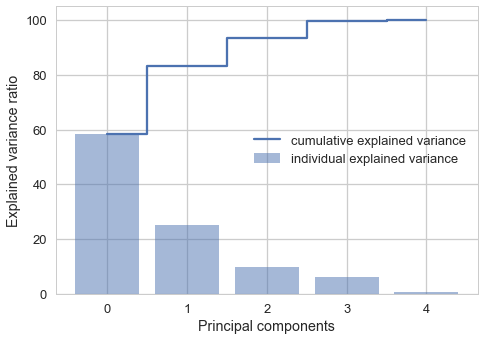

In [24]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(7, 5))

    plt.bar(range(5), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(5), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

In [25]:


pca = PCA(n_components=4)
x_9d = pca.fit_transform(df_norm1)

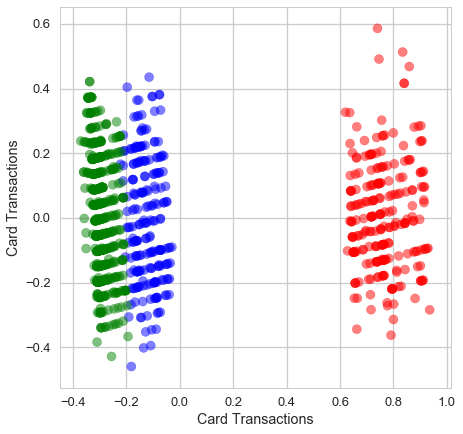

In [26]:
# Set a 3 KMeans clustering
kmeans = KMeans(n_clusters=3)
# Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(x_9d)

# Define our own color map
LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(x_9d[:,0],x_9d[:,2], c= label_color, alpha=0.5)
plt.xlabel('Card Transactions')
plt.ylabel('Card Transactions')
plt.show()

In [27]:
# Calculating Feature Importance
np.random.seed(12345)
# Load the dataset
df = df_norm1
variables = ['Date Diff', 'Time', ' Amount ', 'ATM=1, POS=0', 'ADDRESS_NAME'] 
# convert to numeric format
for variable in variables:
    df[variable] = pd.to_numeric(df[variable], errors='coerce')

subset = df[variables]
predictors = subset[variables]
# Fit an Extra Trees model to the data
model = ExtraTreesClassifier()
model.fit(training_data,training_target)

# Display the relative importance of each attribute
feature_name = list(predictors.columns.values)
feature_importance = list(model.feature_importances_)
features = pd.DataFrame({'name':feature_name, 'importance':feature_importance}).sort_values(by='importance', ascending=False)
print(features.head(len(feature_name)))

   importance          name
4    0.402822  ADDRESS_NAME
1    0.246771          Time
2    0.172311       Amount 
0    0.164133     Date Diff
3    0.013963  ATM=1, POS=0


The curve indicates the average distance is leveling off at 5